In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/ex2data2.txt' ,header=None)

In [3]:
dataset.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
dataset.columns = ['microchip_1','microchip_2','accepted_or_rejected']

In [5]:
dataset.describe()

,microchip_1,microchip_2,accepted_or_rejected
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


# Visualizing Dataset

In [6]:
accepted_chips = dataset.loc[dataset['accepted_or_rejected']==1]
rejected_chips = dataset.loc[dataset['accepted_or_rejected']==0]

In [7]:
accepted_chip1 = accepted_chips.iloc[:,0]
accepted_chip2 = accepted_chips.iloc[:,1]

In [8]:
rejected_chip1 = rejected_chips.iloc[:,0]
rejected_chip2 = rejected_chips.iloc[:,1]

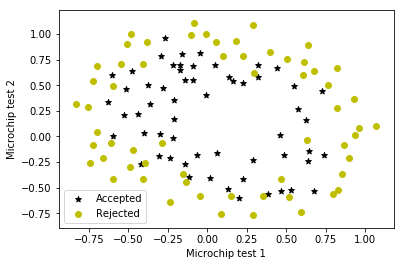

In [9]:
plt.scatter(accepted_chip1,accepted_chip2,c="black",marker="*")
plt.scatter(rejected_chip1,rejected_chip2,c="y",marker="o")
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")
plt.legend(["Accepted","Rejected"],loc=0)

# Map features to higher dimention

In [10]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [11]:
def mapFeatures(x1,x2,degree):
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            term = ( x1**(i-j) * x2**j ).reshape(len(x1),1)
            out = np.hstack((out,term))
    return out

In [12]:
X = mapFeatures(X[:,0],X[:,1],6)

In [13]:
X.shape

(118, 28)

In [14]:
# 1/1+e(-x)
def sigmoid(z):
    return 1/(1+ np.exp(-z))

# Cost Function with regularization

In [15]:
def getCost(X,y,theta,Lambda):
    m = len(y)
    equation_metrix = np.dot(X,theta)
    predictions = sigmoid(equation_metrix)
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)*1/m
    regularizedCost = cost + Lambda/(2*m)*sum(theta**2)
    
    #gradient exactly same to the linear regression,but hypothesis is different
    j_0 = 1/m* np.dot(X.T,(predictions-y))[0]
    j_1 = 1/m* np.dot(X.T,(predictions-y))[1:] + (Lambda/m)*theta[1:]
    gradient = np.vstack((j_0[:,np.newaxis],j_1))
    return regularizedCost,gradient


In [16]:
y = y[:,np.newaxis]
(m,n) = X.shape

In [17]:
theta = np.zeros((n,1))

In [18]:
Lambda=1

In [19]:
j = getCost(X,y,theta,Lambda)

In [20]:
j[0][0]

0.6931471805599461

In [21]:
print("Regularized cost is = "+ str(j[0][0]))

Regularized cost is = 0.6931471805599461


# Gradient Descent

In [22]:
history=[]
def gradientDescent(X,y,theta,learning_rate,num_iterations,Lambda):
    m = len(y)
    for i in range(num_iterations):
        cost,grad = getCost(X,y,theta,Lambda)
        theta = theta - learning_rate*grad
        history.append(cost[0])
    return theta

In [23]:
history=[]
thetas = gradientDescent(X,y,theta,1,800,0.2)
thetas

array([[ 2.25319932],
       [ 1.44552306],
       [ 2.33283911],
       [-3.57008233],
       [-2.35002884],
       [-3.07090829],
       [ 0.50119267],
       [-0.88407626],
       [-0.69606495],
       [-0.22204243],
       [-2.69560917],
       [ 0.04161168],
       [-1.31573798],
       [-0.80286232],
       [-2.23101395],
       [-0.39638083],
       [-0.43758167],
       [ 0.09476652],
       [-0.69300577],
       [-0.78996079],
       [-0.45416815],
       [-2.01051679],
       [ 0.16446857],
       [-0.59855483],
       [ 0.11471778],
       [-0.73960173],
       [-0.52044034],
       [-1.38532427]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

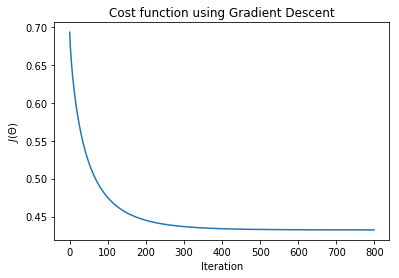

In [25]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")